# Data-X Spring 2019: Homework 06 

## Name : Shun Lin
## SID : 26636176
## Course (IEOR 135/290) : IEOR 135

### Machine Learning



In this homework, you will do some exercises with prediction. We will cover these algorithms in class, but this is for you to have some hands on with these in scikit-learn. You can refer - https://github.com/ikhlaqsidhu/data-x/blob/master/05a-tools-predicition-titanic/titanic.ipynb

Display all your outputs.


In [1]:
import numpy as np
import pandas as pd

In [2]:
 # machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model


# No warnings
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

import matplotlib.pyplot as plt



__ 1. Read __`diabetesdata.csv`__ file into a pandas dataframe. 
About the data: __

1. __TimesPregnant__: Number of times pregnant 
2. __glucoseLevel__: Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. __BP__: Diastolic blood pressure (mm Hg)  
5. __insulin__: 2-Hour serum insulin (mu U/ml) 
6. __BMI__: Body mass index (weight in kg/(height in m)^2) 
7. __pedigree__: Diabetes pedigree function 
8. __Age__: Age (years) 
9. __IsDiabetic__: 0 if not diabetic or 1 if diabetic) 








In [3]:
#Read data & print the head

data=pd.read_csv('diabetesdata.csv')
data.head()


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
0,6,148.0,72,0,33.6,0.627,50.0,1
1,1,NaN,66,0,26.6,0.351,31.0,0
2,8,183.0,64,0,23.3,0.672,NaN,1
3,1,NaN,66,94,28.1,0.167,21.0,0
4,0,137.0,40,168,43.1,2.288,33.0,1


**2. Calculate the percentage of Null values in each column and display it. **

In [4]:
sum_of_nans = sum(len(data) - data.count())
print("There are " + str(sum_of_nans) + " Nan values in the dataframe\n")
print('Percentage of NaNs in the dataframe:\n', data.isnull().sum() / len(data))

There are 67 Nan values in the dataframe

Percentage of NaNs in the dataframe:
 TimesPregnant    0.000000
glucoseLevel     0.044271
BP               0.000000
insulin          0.000000
BMI              0.000000
Pedigree         0.000000
Age              0.042969
IsDiabetic       0.000000
dtype: float64


**3. Split __`data`__  into  __`train_df`__ and __`test_df`__  with 15% as test.**


In [5]:
from IPython.display import display
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.15, random_state=100)

display(train_df.head())
display(test_df.head())


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
458,10,148.0,84,237,37.6,1.001,51.0,1
635,13,104.0,72,0,31.2,0.465,38.0,1
457,5,86.0,68,71,30.2,0.364,24.0,0
674,8,91.0,82,0,35.6,0.587,68.0,0
277,0,104.0,64,116,27.8,0.454,23.0,0


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
173,1,79.0,60,48,43.5,0.678,23.0,0
253,0,86.0,68,0,35.8,0.238,25.0,0
207,5,162.0,104,0,37.7,0.151,52.0,1
737,8,NaN,72,0,32.0,0.600,42.0,0
191,9,123.0,70,94,33.1,0.374,40.0,0


**4. Display the means of the features in train and test sets. Replace the null values in  __`train_df`__ and __`test_df`__  with the mean of EACH feature column separately for train and test. Display head of the dataframes.**

In [6]:
print("The means for each features in the train_df is: ")
display(train_df.mean())
print("\n")
print("The means for each features in the test_df is: ")
display(test_df.mean())
print("\n")

# replace Nan with means
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

print("train_df head")
display(train_df.head())
print("test_df head")
display(test_df.head())

The means for each features in the train_df is: 


TimesPregnant      3.797546
glucoseLevel     120.691318
BP                68.828221
insulin           78.743865
BMI               31.810890
Pedigree           0.469097
Age               33.375602
IsDiabetic         0.348160
dtype: float64



The means for each features in the test_df is: 


TimesPregnant      4.112069
glucoseLevel     122.821429
BP                70.663793
insulin           85.732759
BMI               33.013793
Pedigree           0.487500
Age               33.232143
IsDiabetic         0.353448
dtype: float64



train_df head


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
458,10,148.0,84,237,37.6,1.001,51.0,1
635,13,104.0,72,0,31.2,0.465,38.0,1
457,5,86.0,68,71,30.2,0.364,24.0,0
674,8,91.0,82,0,35.6,0.587,68.0,0
277,0,104.0,64,116,27.8,0.454,23.0,0


test_df head


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age,IsDiabetic
173,1,79.000000,60,48,43.5,0.678,23.0,0
253,0,86.000000,68,0,35.8,0.238,25.0,0
207,5,162.000000,104,0,37.7,0.151,52.0,1
737,8,122.821429,72,0,32.0,0.600,42.0,0
191,9,123.000000,70,94,33.1,0.374,40.0,0


**5. Split __`train_df`__ & __`test_df`__   into  __`X_train`__, __`Y_train`__  and __`X_test`__, __`Y_test`__. __`Y_train`__  and __`Y_test`__ should only have the column we are trying to predict,  __`IsDiabetic`__.**

In [7]:
# get X and Y
X_train=train_df.iloc[:,:-1]
Y_train=train_df[['IsDiabetic']]
X_test=test_df.iloc[:,:-1]
Y_test=test_df[['IsDiabetic']]

print("X_train head")
display(X_train.head())
print("Y_train head")
display(Y_train.head())
print("X_test head")
display(X_test.head())
print("Y_test head")
display(Y_test.head())

X_train head


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age
458,10,148.0,84,237,37.6,1.001,51.0
635,13,104.0,72,0,31.2,0.465,38.0
457,5,86.0,68,71,30.2,0.364,24.0
674,8,91.0,82,0,35.6,0.587,68.0
277,0,104.0,64,116,27.8,0.454,23.0


Y_train head


,IsDiabetic
458,1
635,1
457,0
674,0
277,0


X_test head


,TimesPregnant,glucoseLevel,BP,insulin,BMI,Pedigree,Age
173,1,79.000000,60,48,43.5,0.678,23.0
253,0,86.000000,68,0,35.8,0.238,25.0
207,5,162.000000,104,0,37.7,0.151,52.0
737,8,122.821429,72,0,32.0,0.600,42.0
191,9,123.000000,70,94,33.1,0.374,40.0


Y_test head


,IsDiabetic
173,0
253,0
207,1
737,0
191,0


**6. Use this dataset to train perceptron, logistic regression and random forest models using 15% test split. Report training and test accuracies. Try different hyperparameter values for these models and see if you can improve your accuracies.**

In [8]:
# 6a. Logistic Regression
LogisticRegressionModel = linear_model.LogisticRegression()
print ('Training a logistic Regression Model..')
LogisticRegressionModel.fit(X_train, Y_train)
# TRAINING ACCURACY

training_accuracy=LogisticRegressionModel.score(X_train,Y_train)
print ('Training Accuracy:',training_accuracy)

# TESTING ACCURACY

testing_accuracy=LogisticRegressionModel.score(X_test,Y_test)
print ('Testing Accuracy:',testing_accuracy, '\n')


Training a logistic Regression Model..
Training Accuracy: 0.7745398773006135
Testing Accuracy: 0.75 



In [9]:
# 6b. Perceptron
perceptron = Perceptron()                                    
perceptron.fit(X_train, Y_train)    
train_acc = perceptron.score(X_train, Y_train) 
acc_perceptron = perceptron.score(X_test, Y_test)              
print('Perceptron test accuracy:', str(round(train_acc*100,2)),'%')
print('Perceptron test accuracy:', str(round(acc_perceptron*100,2)),'%')


Perceptron test accuracy: 41.56 %
Perceptron test accuracy: 45.69 %


In [10]:
# 6c. Random Forest
random_forest = RandomForestClassifier(n_estimators=500)   
random_forest.fit(X_train, Y_train)   
acc_train = random_forest.score(X_train, Y_train)
acc_rf = random_forest.score(X_test, Y_test)    

print('Random Forest training accuracy:', str(round(acc_train*100,2)),'%')
print('Random Forest testing accuracy:', str(round(acc_rf*100,2)),'%')


Random Forest training accuracy: 100.0 %
Random Forest testing accuracy: 70.69 %


**7. For your logistic regression model - **

**a . Compute the log probability of classes in  __`IsDiabetic`__ for the first 10 samples of your train set and display it. Also display the predicted class for those samples from your logistic regression model trained before. **


In [11]:
first_10_train = X_train.head(10)
probs = LogisticRegressionModel.predict_proba(first_10_train)
print("probability for each class for the top 10 samples")
print(probs)
print("\n")
print("log probability for each class for the top 10 samples")
log_probs = np.log(probs)
print(log_probs)
print("\n")
print("predicted class for the top 10 samples")
print(LogisticRegressionModel.predict(first_10_train))

probability for each class for the top 10 samples
[[0.21463785 0.78536215]
 [0.55399577 0.44600423]
 [0.8588704  0.1411296 ]
 [0.65789977 0.34210023]
 [0.86717097 0.13282903]
 [0.27150999 0.72849001]
 [0.77923657 0.22076343]
 [0.63294397 0.36705603]
 [0.63602604 0.36397396]
 [0.91826023 0.08173977]]


log probability for each class for the top 10 samples
[[-1.5388031  -0.24161033]
 [-0.59059823 -0.80742684]
 [-0.15213725 -1.95807663]
 [-0.41870268 -1.07265152]
 [-0.14251913 -2.01869245]
 [-1.30375635 -0.31678136]
 [-0.2494406  -1.51066359]
 [-0.45737337 -1.00224077]
 [-0.45251578 -1.01067294]
 [-0.08527446 -2.50421459]]


predicted class for the top 10 samples
[1 0 0 0 0 1 0 0 0 0]


**b . Now compute the log probability of classes in  __`IsDiabetic`__ for the first 10 samples of your test set and display it. Also display the predicted class for those samples from your logistic regression model trained before.
 (using the model trained on the training set)**


In [12]:
first_10_test = X_test.head(10)
probs = LogisticRegressionModel.predict_proba(first_10_test)
print("probability for each class for the top 10 samples")
print(probs)
print("\n")
print("log probability for each class for the top 10 samples")
log_probs = np.log(probs)
print(log_probs)
print("\n")
print("predicted class for the top 10 samples")
print(LogisticRegressionModel.predict(first_10_test))

probability for each class for the top 10 samples
[[0.78857689 0.21142311]
 [0.88984229 0.11015771]
 [0.42855734 0.57144266]
 [0.51234994 0.48765006]
 [0.51627081 0.48372919]
 [0.34209928 0.65790072]
 [0.0622243  0.9377757 ]
 [0.81699332 0.18300668]
 [0.19503948 0.80496052]
 [0.7219596  0.2780404 ]]


log probability for each class for the top 10 samples
[[-0.23752536 -1.55389391]
 [-0.11671103 -2.20584226]
 [-0.84733072 -0.55959114]
 [-0.66874742 -0.71815721]
 [-0.66112383 -0.72623005]
 [-1.0726543  -0.41870124]
 [-2.77700966 -0.06424449]
 [-0.20212436 -1.69823264]
 [-1.63455325 -0.21696205]
 [-0.3257861  -1.27998885]]


predicted class for the top 10 samples
[0 0 1 0 0 1 1 0 1 0]


**c . What can you interpret from the log probabilities and the predicted classes?**



The log probabilites is defined as 

$$ log(prob) $$

And we know that probability lies in the range of 0 and 1, therefore the log probabiliy is less than or equal to 0. We can interpret from the log probabilities how confident our logistic model is for predicting the class of a sample. The less negative (higher) the log probabiliy is, the higher the probability our logistic model predicts for the given class. And the more negative (lower) the log probailiy is, the lower the probabiliy our logistic model predicts for the given class. Thus, given the log probabiliy, the logistic regression model will make prediction for the one that has higher log probability. Thus the predicted class for a given sample in a logistic regression model is the one that has the higher log probabiliites.

Given the log probabiliy, the logistic regression model will make prediction for the one that has higher log probability. Thus the predicted class for a given sample in a logistic regression model is the one that has the higher log probabiliites.

**8. Is mean imputation is the best type of imputation (as we did in 4.) to use? Why or why not? What are some other ways to impute the data?**

Mean imputation may not be the best type of imputation to use, the best imputation for a column of data depends on the type of data. For glucoseLevel instead of using the mean from the data we can use what is the normal glucose level to fill in the NAN values in glucoseLevel column. For age we can use the median instead of average to fight against out-liers. For other data sometimes it is better to use 0 instead of mean/average because sometimes the absence of measurement may implies 0. Other ways to impute the data includes Substitution, hot/cold deck imputation, Regression imputation, Stochastic regression imputation, Interpolation and extrapolation.

Reference:
https://www.theanalysisfactor.com/seven-ways-to-make-up-data-common-methods-to-imputing-missing-data/

## Extra Credit (2 pts) - MANDATORY for students enrolled in IEOR 290


**9.  Implement the K-Nearest Neighbours (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) algorithm for k=1 from scratch in python (do not use KNN from existing libraries). KNN uses Euclidean distance to find nearest neighbors. Split your dataset into test and train as before. Also fill in the null values with mean of features as done earlier. Use this algorithm to predict values for 'IsDiabetic' for your test set. Display your accuracy. **

In [13]:
import copy

# get X_train, Y_train, X_test, Y_test
X_train=train_df.iloc[:,:-1]
Y_train=train_df[['IsDiabetic']]
X_test=test_df.iloc[:,:-1]
Y_test=test_df[['IsDiabetic']]


In [14]:
# helper functions
def init_knn(X_train, Y_train, X_test):
    m = len(X_test)
    n = len(X_train)
    
    # neighbors are a list of votes
    # neightors[i] = [1 0 0 1 ....] where each element is the result from a point in the X_training set
    neighbors = [0] * m
    
    # Building lables so we only have to build it once
    for i in range(m):
        labels = [0] * n
        distances = [0] * n
        sample = X_test.iloc[i]
        for j in range(n):
            training_point = X_train.iloc[j]
            training_label = Y_train.iloc[j]["IsDiabetic"]
            distance = np.linalg.norm(sample-training_point)
            distances[j] = distance
            labels[j] = training_label       
        sorted_neighbors = [label for _,label in sorted(zip(distances,labels))]
        neighbors[i] = copy.deepcopy(sorted_neighbors)
    return neighbors
    
def predict_knn(neighbors, k):
    m = len(neighbors)
    result = [0] * m
    for i in range(m):
        lst = neighbors[i][0:k]
        result[i] = max(lst,key=lst.count)
    return result

def accuracy(Y_test, result):
    total_count = len(result)
    same_prediction = 0
    for i in range(len(result)):
        same_prediction += abs(Y_test["IsDiabetic"].iloc[i] - result[i])
    return same_prediction / total_count
    

In [15]:
# initialize k_nn
neighbors = init_knn(X_train, Y_train, X_test)

In [16]:
# predict
k = 3
result = predict_knn(neighbors, k)


In [17]:
# get accuracy
acc = accuracy(Y_test, result)

In [18]:
print(acc)

0.3448275862068966


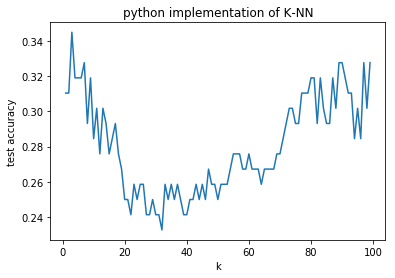

max accuracy is 0.3448275862068966 at k = 3
accuracy for k = 1 is 0.3103448275862069


In [19]:
max_k = 100

x = [i for i in range(1, max_k)]
y = [0] * len(x)
max_x = 0
max_y = 0

for i in range(len(x)):
    k = x[i]
    result = predict_knn(neighbors, k)
    acc = accuracy(Y_test, result)
    y[i] = acc
    
    if acc > max_y:
        max_x = k
        max_y = acc
    
plt.plot(x, y)
plt.ylabel('test accuracy')
plt.xlabel('k')
plt.title('python implementation of K-NN')
plt.show()
print("max accuracy is " + str(max_y) + " at k = " + str(max_x))

print("accuracy for k = 1 is " + str(y[0]))